In [1]:
from scipy.optimize import minimize
import jax.numpy as jnp
from jax import grad

In [2]:
def f(x):
    return jnp.sum(x**2)

df = grad(f)

In [3]:
result = minimize(f, jnp.array([1.0,1.0]), method="TNC", jac=df, callback=print)

[0. 0.]


In [4]:
result

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 1
     jac: [ 0.000e+00  0.000e+00]
    nfev: 3

In [5]:
from jaxgp.kernels import Periodic
import matplotlib.pyplot as plt

0.0


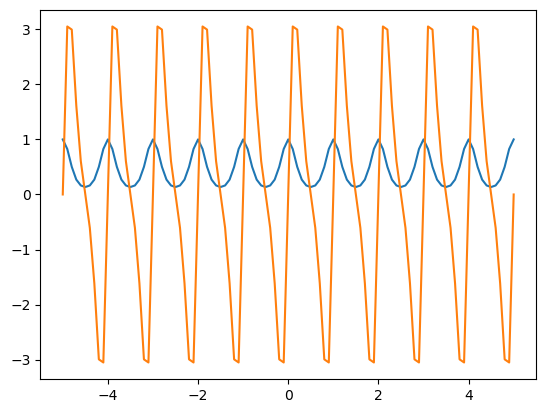

In [7]:
kernel = Periodic()
x = jnp.linspace(-5,5,101)
ref = jnp.array([0.0])
y = [kernel.eval(point,ref,(1.0,1.0,1.0)) for point in x]
d1y = [kernel.grad2(point,ref,0,jnp.array([1.0,1.0,1.0])) for point in x]

plt.plot(x,y)
plt.plot(x,d1y)

print(kernel.grad2(ref,ref,0,jnp.array([1.0,1.0,1.0])))